In [15]:
#Import the libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [16]:
#Get the stock quote
df = pd.read_csv('dashprices.csv')
#Set the date as the index
df = df.set_index(pd.DatetimeIndex(df['date'].values))
#Show the data
df.tail(5)

,symbol,date,close,volume
2021-01-12,DASH/USD,2021-01-12,128.493,27694.167530
2021-01-13,DASH/USD,2021-01-13,133.512,27952.787741
2021-01-14,DASH/USD,2021-01-14,132.664,11034.697115
2021-01-15,DASH/USD,2021-01-15,124.320,14795.750073
2021-01-16,DASH/USD,2021-01-16,129.906,6145.022214


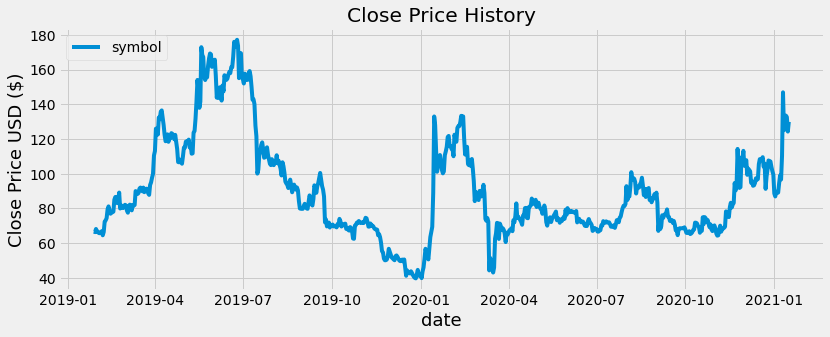

In [17]:
#Visually Show The Stock Price
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( df['close'],  label='Close Price')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)  
plt.title('Close Price History')
plt.xlabel('date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend(df.columns.values, loc='upper left')
plt.show()

In [18]:
#Calculate the typical price
typical_price = df["close"]
typical_price

2019-01-28     66.680
2019-01-29     66.349
2019-01-30     68.170
2019-01-31     66.550
2019-02-01     66.665
2019-02-02     65.794
2019-02-03     65.743
2019-02-04     65.975
2019-02-05     66.923
2019-02-06     64.521
2019-02-07     66.464
2019-02-08     72.481
2019-02-09     73.131
2019-02-10     74.416
2019-02-11     79.496
2019-02-12     81.190
2019-02-13     78.944
2019-02-14     76.957
2019-02-15     77.657
2019-02-16     77.791
2019-02-17     78.153
2019-02-18     85.015
2019-02-19     86.603
2019-02-20     86.596
2019-02-21     83.053
2019-02-22     85.240
2019-02-23     89.142
2019-02-24     79.974
2019-02-25     81.835
2019-02-26     80.933
               ...   
2020-12-18    107.989
2020-12-19    108.336
2020-12-20    109.556
2020-12-21    104.000
2020-12-22    105.832
2020-12-23     91.299
2020-12-24     98.493
2020-12-25    102.387
2020-12-26    107.650
2020-12-27    107.000
2020-12-28    107.083
2020-12-29    104.030
2020-12-30    101.500
2020-12-31     99.531
2021-01-01

In [19]:
period =  14 #The typical period used for MFI is 14 days

In [20]:
#Calculate the money flow
money_flow = typical_price * df['volume']
money_flow

2019-01-28    4.158943e+04
2019-01-29    1.030850e+04
2019-01-30    1.655854e+04
2019-01-31    1.051463e+05
2019-02-01    4.064832e+04
2019-02-02    3.404779e+04
2019-02-03    2.751676e+04
2019-02-04    2.112016e+04
2019-02-05    2.327017e+04
2019-02-06    7.824513e+04
2019-02-07    8.398545e+03
2019-02-08    3.835131e+04
2019-02-09    1.013006e+04
2019-02-10    1.364040e+04
2019-02-11    5.674244e+04
2019-02-12    1.172214e+05
2019-02-13    4.993377e+04
2019-02-14    7.838748e+04
2019-02-15    3.200261e+04
2019-02-16    5.502926e+03
2019-02-17    4.622937e+03
2019-02-18    2.980204e+04
2019-02-19    2.137108e+04
2019-02-20    1.421538e+05
2019-02-21    7.672792e+04
2019-02-22    7.848239e+03
2019-02-23    6.019251e+04
2019-02-24    6.845708e+04
2019-02-25    1.433030e+04
2019-02-26    3.336013e+04
                  ...     
2020-12-18    4.905274e+05
2020-12-19    9.356619e+05
2020-12-20    7.915089e+05
2020-12-21    8.731917e+05
2020-12-22    6.509176e+05
2020-12-23    7.475594e+05
2

In [21]:
#Get all of the positive and negative money flows 
#where the current typical price is higher than the previous day's typical price, we will append that days money flow to a positive list
#and where the current typical price is lower than the previous day's typical price, we will append that days money flow to a negative list
#and set any other value to 0 to be used when summing
positive_flow =[] #Create a empty list called positive flow
negative_flow = [] #Create a empty list called negative flow
#Loop through the typical price 
for i in range(1, len(typical_price)):
  if typical_price[i] > typical_price[i-1]: #if the present typical price is greater than yesterdays typical price
    positive_flow.append(money_flow[i-1])# Then append money flow at position i-1 to the positive flow list
    negative_flow.append(0) #Append 0 to the negative flow list
  elif typical_price[i] < typical_price[i-1]:#if the present typical price is less than yesterdays typical price
    negative_flow.append(money_flow[i-1])# Then append money flow at position i-1 to negative flow list
    positive_flow.append(0)#Append 0 to the positive flow list
  else: #Append 0 if the present typical price is equal to yesterdays typical price
    positive_flow.append(0)
    negative_flow.append(0)

In [22]:
#Get all of the positive and negative money flows within the time period
positive_mf =[]
negative_mf = [] 
#Get all of the positive money flows within the time period
for i in range(period-1, len(positive_flow)):
  positive_mf.append(sum(positive_flow[i+1-period : i+1]))
#Get all of the negative money flows within the time period  
for i in range(period-1, len(negative_flow)):
  negative_mf.append(sum(negative_flow[i+1-period : i+1]))

In [23]:
mfi = 100 * (np.array(positive_mf) / (np.array(positive_mf)  + np.array(negative_mf) ))
mfi

array([66.71134912, 76.34392703, 60.78991109, 57.54065385, 55.63961828,
       61.88962576, 66.02357026, 64.57659361, 65.1395977 , 65.36685108,
       45.63515042, 51.12549891, 48.81803585, 43.85221141, 47.95071188,
       42.81271148, 48.56006519, 60.42224542, 61.50154592, 59.20761325,
       58.44672753, 55.98993643, 56.60303717, 60.49272469, 68.29778406,
       60.31643109, 61.3046892 , 67.10567306, 62.65822137, 67.12356822,
       56.08834694, 41.99176336, 40.96310844, 44.35725828, 46.07481796,
       41.51062141, 32.35943993, 36.24346072, 38.56046525, 41.83922852,
       40.6206762 , 39.45034999, 37.55567307, 32.67479131, 40.773213  ,
       54.36694844, 52.96876646, 56.68405764, 58.97611111, 73.98128985,
       88.60562033, 67.35148808, 48.26424965, 54.75178943, 52.82872479,
       56.67218624, 59.00379317, 56.48972458, 50.95571013, 46.54457531,
       41.38401392, 43.4760153 , 43.33735042, 34.92825919, 30.16305213,
       32.49805675, 42.8109267 , 33.05837997, 33.20298731, 27.10

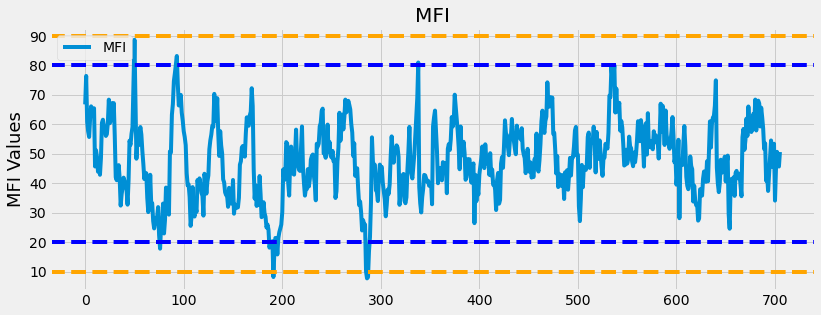

In [24]:
# Visually Show The Money Flow Index
df2 = pd.DataFrame()
df2['MFI'] = mfi
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( df2['MFI'],  label='MFI')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.axhline(10, linestyle='--', color = 'orange')  #Over Sold line (Buy)
plt.axhline(20, linestyle='--',color = 'blue')  #Over Sold Line (Buy)
plt.axhline(80, linestyle='--', color = 'blue')  #Over Bought line (Sell)
plt.axhline(90, linestyle='--', color = 'orange')  #Over Bought line (Sell)
plt.title('MFI')
plt.ylabel('MFI Values',fontsize=18)
plt.legend(df2.columns.values, loc='upper left')
plt.show()

In [25]:
#Create a new data frame
new_df = pd.DataFrame()
new_df = df[period:]
new_df['MFI'] = mfi
#Show the new data frame
new_df

,symbol,date,close,volume,MFI
2019-02-11,DASH/USD,2019-02-11,79.496,713.777241,66.711349
2019-02-12,DASH/USD,2019-02-12,81.190,1443.791677,76.343927
2019-02-13,DASH/USD,2019-02-13,78.944,632.521389,60.789911
2019-02-14,DASH/USD,2019-02-14,76.957,1018.588053,57.540654
2019-02-15,DASH/USD,2019-02-15,77.657,412.102071,55.639618
2019-02-16,DASH/USD,2019-02-16,77.791,70.739883,61.889626
2019-02-17,DASH/USD,2019-02-17,78.153,59.152392,66.023570
2019-02-18,DASH/USD,2019-02-18,85.015,350.550403,64.576594
2019-02-19,DASH/USD,2019-02-19,86.603,246.770677,65.139598
2019-02-20,DASH/USD,2019-02-20,86.596,1641.574508,65.366851


In [26]:
# Create a function to get the buy and sell signals
#MFI above 80 is considered overbought condition and MFI below 20 is considered oversold.
#MFI > 80 then Sell
#MFI < 20 then Buy
def get_signal(data, high, low):
  
    buy_signal = [] #The stock was over sold
    sell_signal = [] #The stock was over bought

    for i in range(len(data['MFI'])):
        if data['MFI'][i] > high:#Then the stock is over bought, you should sell 
      
            buy_signal.append(np.nan)
            sell_signal.append(data['close'][i])
        elif data['MFI'][i] < low: #Then the stock is over sold, you should buy
            buy_signal.append(data['close'][i])
            sell_signal.append(np.nan)
        else:
      
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
        
    return (buy_signal, sell_signal)

In [27]:
#Add new columns (Buy & Sell)
new_df['Buy'] = get_signal(new_df, 80, 20)[0]
new_df['Sell'] = get_signal(new_df, 80, 20)[1]
#Show the new dataframe
new_df

,symbol,date,close,volume,MFI,Buy,Sell
2019-02-11,DASH/USD,2019-02-11,79.496,713.777241,66.711349,NaN,NaN
2019-02-12,DASH/USD,2019-02-12,81.190,1443.791677,76.343927,NaN,NaN
2019-02-13,DASH/USD,2019-02-13,78.944,632.521389,60.789911,NaN,NaN
2019-02-14,DASH/USD,2019-02-14,76.957,1018.588053,57.540654,NaN,NaN
2019-02-15,DASH/USD,2019-02-15,77.657,412.102071,55.639618,NaN,NaN
2019-02-16,DASH/USD,2019-02-16,77.791,70.739883,61.889626,NaN,NaN
2019-02-17,DASH/USD,2019-02-17,78.153,59.152392,66.023570,NaN,NaN
2019-02-18,DASH/USD,2019-02-18,85.015,350.550403,64.576594,NaN,NaN
2019-02-19,DASH/USD,2019-02-19,86.603,246.770677,65.139598,NaN,NaN
2019-02-20,DASH/USD,2019-02-20,86.596,1641.574508,65.366851,NaN,NaN


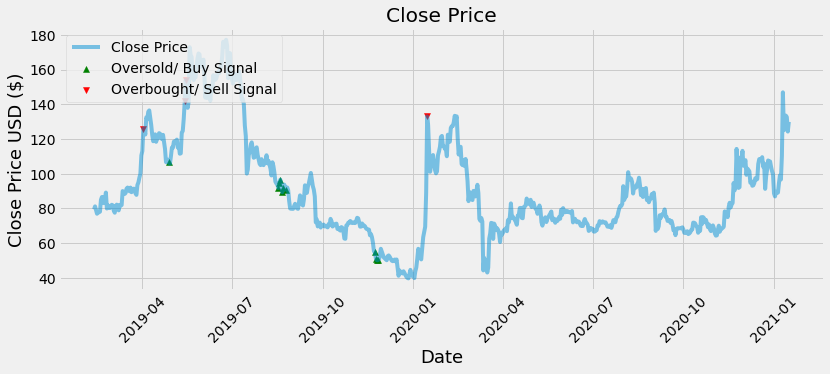

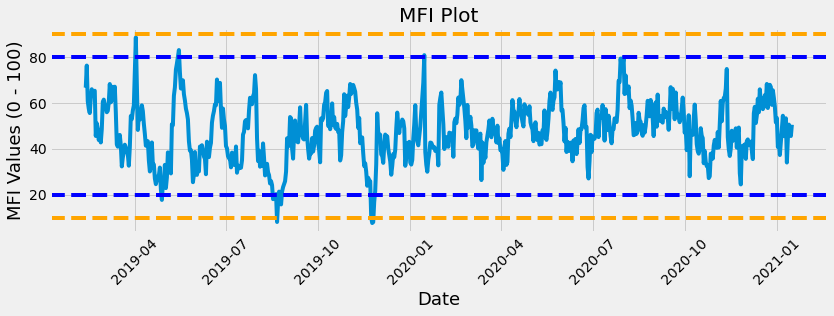

In [28]:
# plot the close price history
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df.index, new_df['close'],alpha = 0.5, label='Close Price')
plt.scatter(new_df.index, new_df['Buy'], color = 'green', label='Oversold/ Buy Signal', marker = '^', alpha = 1)
plt.scatter(new_df.index, new_df['Sell'], color = 'red', label='Overbought/ Sell Signal', marker = 'v', alpha = 1)
plt.title('Close Price')
plt.xlabel('Date',fontsize=18)
plt.xticks(rotation = 45)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()
# plot the corresponding MFI values and significant levels
plt.figure(figsize=(12.4,3.5))
plt.title('MFI Plot')
plt.plot(new_df.index, new_df['MFI'])
plt.axhline(10, linestyle='--',color = 'orange') #Buy
plt.axhline(20, linestyle='--', color = 'blue') #Sell
plt.axhline(80, linestyle='--', color = 'blue') #Sell
plt.axhline(90, linestyle='--', color = 'orange') #Sell
plt.xlabel('Date',fontsize=18)
plt.xticks(rotation = 45)
plt.ylabel('MFI Values (0 - 100)',fontsize=18)
plt.show()

In [29]:
# convert to csv
new_df.to_csv(r"mfi_dash.csv", index = False)